In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import datetime as dt

In [2]:
# vestland rockfallfall meterological databse for comparison
df = pd.read_excel('Vestland_meterological_database.xlsx', parse_dates = ['skredTidspunkt'])


In [3]:
df

Unnamed: 0  OBJECTID   Var1                               skredID  \
0               0         1   1853  92632E8B-5FF9-4755-B8D0-71EF681FF9D6   
1               1         2   2584  E12D0664-7AC2-4FAA-BF33-DB3A1F8DEE22   
2               2         3   3808  A73C9FAB-6016-4299-9B19-9B6D729D8C32   
3               3         4   4139  08978771-1CE4-48B2-A2EF-57BA9FBDDF31   
4               4         5   5399  1A249655-92A7-4679-851E-9EB83800417E   
...           ...       ...    ...                                   ...   
13536       14168     14169  23868  F36BD4AC-6655-4AD9-B49D-D06C1A70BFE8   
13537       14169     14170  24087  73C16DA8-2673-408B-9C51-C0F8CA06E265   
13538       14170     14171  24088  795C703B-C499-4688-850C-EEAD6701F9A9   
13539       14171     14172  26277  B054DC1E-5F1F-4211-88AF-D375179D5AB4   
13540       14172     14173  26475  EE62E0F7-B84A-473D-8CBD-4D89CB6687FE   

       skredType               skredNavn               stedsnavn  \
0            110              Mølstrevåg              Mølstrevåg   
1            110                    Våga                    Våga   
2            110                  Buavåg                  Buavåg   
3            110  Holmefjord - Holmesund  Holmefjord - Holmesund   
4            111            Auklandshavn            Auklandshavn   
...          ...                     ...                     ...   
13536        111                  Kleiva                  Kleiva   
13537        110                  Kleiva                  Kleiva   
13538        111                     NaN                     NaN   
13539        111         Hoddevikfjellet         Hoddevikfjellet   
13540        110                  Kleiva                  Kleiva   

                skredTidspunkt noyaktighetSkredTidspunkt noyaktighetPosisjon  \
0      16.02.2011 00:00:00.000       Ukjent nar pa dagen               100 m   
1      15.11.2010 00:00:00.000       Ukjent nar pa dagen                10 m   
2      17.04.2002 00:00:00.000       Ukjent nar pa dagen              Eksakt   
3      19.03.2003 00:00:00.000       Ukjent nar pa dagen              Eksakt   
4      02.10.2009 00:00:00.000       Ukjent nar pa dagen              Eksakt   
...                        ...                       ...                 ...   
13536  26.10.2014 01:15:50.000                    Eksakt              Eksakt   
13537  12.01.2012 06:00:00.000                    30 min                10 m   
13538  07.04.2017 11:09:00.000                    Eksakt              Eksakt   
13539  09.06.2010 09:30:00.000                    Eksakt              Eksakt   
13540  23.02.2012 05:00:00.000                    30 min              Eksakt   

       ...   AccPrec14 Temp_range14 Temp_fluct near_zero_events14  \
0      ...  102.827088         6.40          3                  5   
1      ...   76.955455         8.90          0                  1   
2      ...    7.696000         4.92          0                  0   
3      ...   40.367534         3.33          0                  0   
4      ...  140.505556         8.10          0                  0   
...    ...         ...          ...        ...                ...   
13536  ...  228.621907         5.72          0                  0   
13537  ...  265.836968         4.59          0                  2   
13538  ...  245.854126         6.93          0                  0   
13539  ...   20.140592         4.93          0                  0   
13540  ...  197.663912         5.20          2                  2   

      near_zero_events7 Thaw_degree_days_14 Freeze_degree_days_14  \
0                     5           29.452873             -3.942592   
1                     1           66.968971              0.000000   
2                     0           94.438656              0.000000   
3                     0           53.172514              0.000000   
4                     0          155.637967              0.000000   
...                 ...                 ...                   ...   
1353

In [4]:
ref_mean = pd.read_excel('Vestland_reference_mean_1990_2020.xlsx', index_col = [0])

In [5]:
ref_mean

mean_temperature   precipitation_amount
time                                                
1990-01-01          -9.117544               0.263658
1990-01-02          -8.687544               0.263658
1990-01-03          -5.281294               0.265533
1990-01-04          -2.792544               7.379283
1990-01-05          -3.678794               0.651158
...                       ...                    ...
2019-07-08           9.983559               2.523907
2019-07-09          10.876892               0.945240
2019-07-10          12.245559               1.112573
2019-07-11          14.274892               1.017907
2019-07-12          15.594892               0.939240

[10785 rows x 2 columns]

In [6]:
ref_mean = ref_mean['1991-01-01' : '2019-12-31']

In [7]:
#ref_mean_2018_2020 = ref_mean['2018-01-01' : '2019-12-31']

In [8]:
ref_mean

mean_temperature   precipitation_amount
time                                                
1991-01-01          -1.543794               6.469283
1991-01-02          -0.735044               3.267408
1991-01-03           0.999956              23.364283
1991-01-04           0.449331              16.539283
1991-01-05          -0.190669              22.507408
...                       ...                    ...
2019-07-08           9.983559               2.523907
2019-07-09          10.876892               0.945240
2019-07-10          12.245559               1.112573
2019-07-11          14.274892               1.017907
2019-07-12          15.594892               0.939240

[10420 rows x 2 columns]

In [9]:
ref_mean_2018_2020_14_acc =  ref_mean_2018_2020.groupby(pd.Grouper(freq='14D')).sum()
ref_mean_2018_2020_3_acc = ref_mean_2018_2020.groupby(pd.Grouper(freq='3D')).sum()

NameError: name 'ref_mean_2018_2020' is not defined

In [10]:
ref_grouped_14_acc= ref_mean.groupby(pd.Grouper(freq='14D')).sum()
ref_grouped_7_acc = ref_mean.groupby(pd.Grouper(freq='7D')).sum()
ref_grouped_3_acc = ref_mean.groupby(pd.Grouper(freq='3D')).sum()
ref_grouped_1_acc = ref_mean.groupby(pd.Grouper(freq='1D')).sum()

In [11]:
ref_grouped_14_mean = ref_mean.groupby(pd.Grouper(freq='14D')).mean()
ref_grouped_7_mean = ref_mean.groupby(pd.Grouper(freq='7D')).mean()
ref_grouped_3_mean = ref_mean.groupby(pd.Grouper(freq='3D')).mean()
ref_grouped_1_mean = ref_mean.groupby(pd.Grouper(freq='1D')).mean()

In [12]:
ref_grouped_14_max = ref_mean.groupby(pd.Grouper(freq='14D')).max()
ref_grouped_7_max = ref_mean.groupby(pd.Grouper(freq='7D')).max()
ref_grouped_3_max = ref_mean.groupby(pd.Grouper(freq='3D')).max()
ref_grouped_1_max = ref_mean.groupby(pd.Grouper(freq='1D')).max()

In [13]:
ref_grouped_14_max = ref_mean.groupby(pd.Grouper(freq='14D')).max()
ref_grouped_7_max = ref_mean.groupby(pd.Grouper(freq='7D')).max()
ref_grouped_3_max = ref_mean.groupby(pd.Grouper(freq='3D')).max()
ref_grouped_1_max = ref_mean.groupby(pd.Grouper(freq='1D')).max()

In [14]:
ref_grouped_14_min = ref_mean.groupby(pd.Grouper(freq='14D')).min()
ref_grouped_7_min = ref_mean.groupby(pd.Grouper(freq='7D')).min()
ref_grouped_3_min = ref_mean.groupby(pd.Grouper(freq='3D')).min()
ref_grouped_1_min = ref_mean.groupby(pd.Grouper(freq='1D')).min()

In [15]:
ref_grouped_14_std = ref_mean.groupby(pd.Grouper(freq='14D')).std()
ref_grouped_7_std = ref_mean.groupby(pd.Grouper(freq='7D')).std()
ref_grouped_3_std = ref_mean.groupby(pd.Grouper(freq='3D')).std()
ref_grouped_1_std = ref_mean.groupby(pd.Grouper(freq='1D')).std()

In [16]:
ref_grouped_14_var= ref_mean.groupby(pd.Grouper(freq='14D')).var()
ref_grouped_7_var = ref_mean.groupby(pd.Grouper(freq='7D')).var()
ref_grouped_3_var = ref_mean.groupby(pd.Grouper(freq='3D')).var()
ref_grouped_1_var = ref_mean.groupby(pd.Grouper(freq='1D')).var()

In [17]:
ref_rolling_mean_3 = ref_mean[' precipitation_amount'].rolling(3).sum() 

In [18]:
ref_rolling_mean_3

time
1991-01-01          NaN
1991-01-02          NaN
1991-01-03    33.100974
1991-01-04    43.170974
1991-01-05    62.410974
                ...    
2019-07-08     8.052386
2019-07-09     6.156386
2019-07-10     4.581720
2019-07-11     3.075720
2019-07-12     3.069720
Name:  precipitation_amount, Length: 10420, dtype: float64

In [19]:
from scipy.stats import lognorm
from scipy.stats import gamma

C:\Users\LEm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LEm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


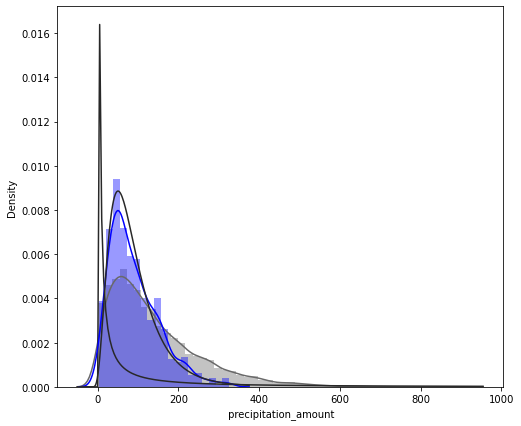

In [20]:
fig = plt.figure(figsize=(8, 7))
ax = sns.distplot(df['AccPrec14'], color = 'dimgrey',hist=True,fit= lognorm)
ax = sns.distplot(ref_grouped_14_acc[' precipitation_amount'],hist=True, color = 'b',fit= lognorm)


C:\Users\LEm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LEm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


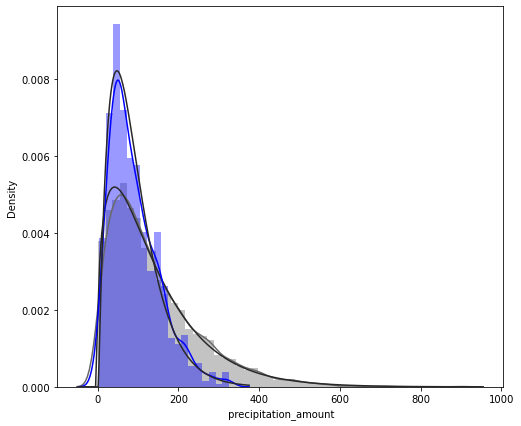

In [21]:
fig = plt.figure(figsize=(8, 7))
ax = sns.distplot(df['AccPrec14'], color = 'dimgrey',fit= gamma)
ax = sns.distplot(ref_grouped_14_acc[' precipitation_amount'], color = 'b',fit= gamma)

C:\Users\LEm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LEm\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


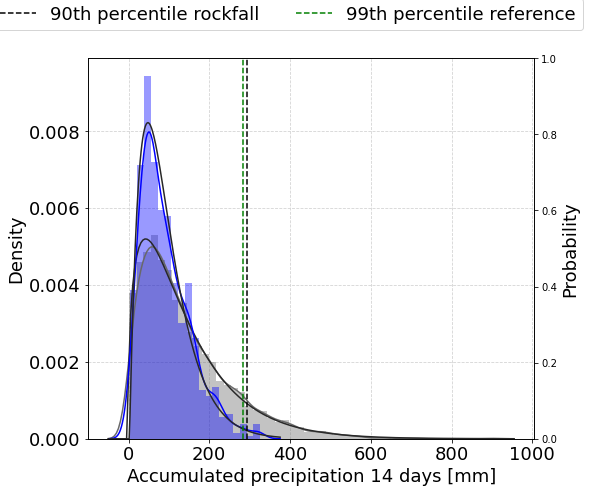

In [22]:
percentile952 = np.percentile(a =  ref_grouped_14_acc[' precipitation_amount'], q = 99)

percentile95 = np.percentile(a =df['AccPrec14'], q = 90)

fig = plt.figure(figsize=(8, 7))


ax = sns.distplot(df['AccPrec14'], color = 'dimgrey',fit= gamma)
ax = sns.distplot(ref_grouped_14_acc[' precipitation_amount'], color = 'b',fit= gamma)

ax.grid(linestyle='dashed', color = 'lightgrey')
ax.set_axisbelow(True)

plt.xlabel('Accumulated precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)

#sns.ecdfplot(ref_grouped_14_acc[' precipitation_amount'], color = 'lightgreen')
#sns.ecdfplot(df['AccPrec14'], color = 'dimgrey')

ax.axvline(x = percentile95, color = 'k', label = '90th percentile rockfall', linestyle = 'dashed')
ax.axvline(x = percentile952, color = 'g', label = '99th percentile reference', linestyle = 'dashed')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2,fontsize=18)

plt.title('')
plt.savefig('Gamma_ccc_prec_14_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

### Precipitation

In [23]:
percentile952 = np.percentile(a =  ref_mean_2018_2020_14_acc[' precipitation_amount'], q = 99)

percentile95 = np.percentile(a =df['AccPrec14'], q = 90)

fig = plt.figure(figsize=(8, 7))


ax = sns.histplot(df['AccPrec14'], stat = 'density', color = 'dimgrey', edgecolor = None, alpha = 0.7, kde = False,label = 'Rockfall climate',bins = 20)

ax = sns.histplot(ref_mean_2018_2020_14_acc[' precipitation_amount'], stat = 'density', color = 'lightgreen',edgecolor = None, alpha = 0.7, kde = False, label = '1991 - 2020 reference',bins = 10)

ax.grid(linestyle='dashed', color = 'lightgrey')
ax.set_axisbelow(True)

plt.xlabel('Accumulated precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)

sns.ecdfplot(ref_mean_2018_2020_14_acc[' precipitation_amount'], color = 'lightgreen')
sns.ecdfplot(df['AccPrec14'], color = 'dimgrey')

ax.axvline(x = percentile95, color = 'k', label = '90th percentile rockfall', linestyle = 'dashed')
ax.axvline(x = percentile952, color = 'g', label = '99th percentile reference', linestyle = 'dashed')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2,fontsize=18)

plt.title('')
plt.savefig('2018_2020_Acc_prec_14_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

NameError: name 'ref_mean_2018_2020_14_acc' is not defined

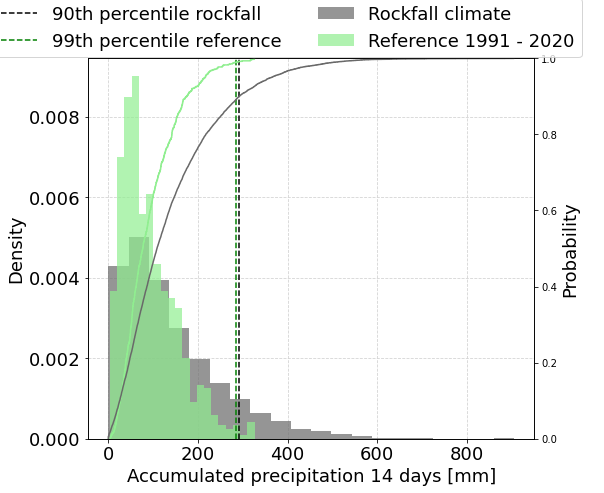

In [27]:
percentile952 = np.percentile(a =  ref_grouped_14_acc[' precipitation_amount'], q = 99)

percentile95 = np.percentile(a =df['AccPrec14'], q = 90)

fig = plt.figure(figsize=(8, 7))


ax = sns.histplot(df['AccPrec14'], stat = 'density', color = 'dimgrey', edgecolor = None, alpha = 0.7, kde = False,label = 'Rockfall climate',bins = 20)

ax = sns.histplot(ref_grouped_14_acc[' precipitation_amount'], stat = 'density', color = 'lightgreen',edgecolor = None, alpha = 0.7, kde = False, label = 'Reference 1991 - 2020',bins = 20)

ax.grid(linestyle='dashed', color = 'lightgrey')
ax.set_axisbelow(True)

plt.xlabel('Accumulated precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)

sns.ecdfplot(ref_grouped_14_acc[' precipitation_amount'], color = 'lightgreen')
sns.ecdfplot(df['AccPrec14'], color = 'dimgrey')

ax.axvline(x = percentile95, color = 'k', label = '90th percentile rockfall', linestyle = 'dashed')
ax.axvline(x = percentile952, color = 'g', label = '99th percentile reference', linestyle = 'dashed')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2,fontsize=18)

plt.title('')
plt.savefig('Histogram_Acc_prec_14_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

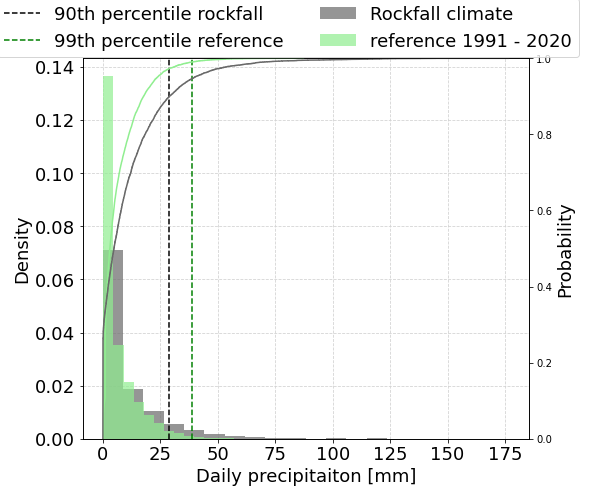

In [26]:
percentile952 = np.percentile(a =  ref_mean[' precipitation_amount'], q = 99)
percentile95 = np.percentile(a =df['PrecEventDay'], q = 90)

fig = plt.figure(figsize=(8, 7))


ax = sns.histplot(df['PrecEventDay'], stat = 'density', color = 'dimgrey', edgecolor = None, alpha = 0.7, kde = False,label = 'Rockfall climate',bins = 20)

ax = sns.histplot(ref_grouped_1_acc[' precipitation_amount'], stat = 'density', color = 'lightgreen',edgecolor = None, alpha = 0.7, kde = False, label = 'Reference 1991 - 2020',bins = 20)

ax.grid(linestyle='dashed', color = 'lightgrey')
ax.set_axisbelow(True)

plt.xlabel('Daily precipitaiton [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)

sns.ecdfplot(ref_grouped_1_acc[' precipitation_amount'], color = 'lightgreen')
sns.ecdfplot(df['PrecEventDay'], color = 'dimgrey')

ax.axvline(x = percentile95, color = 'k', label = '90th percentile rockfall', linestyle = 'dashed')
ax.axvline(x = percentile952, color = 'g', label = '99th percentile reference', linestyle = 'dashed')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2,fontsize=18)

plt.title('')
plt.savefig('Histogram_daily_precipitation_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [278]:
df['PrecEventDay'].quantile(.6)

7.93

In [273]:
daily_prec_90 = np.percentile(a =  ref_mean[' precipitation_amount'], q = 90)
daily_prec_95 = np.percentile(a =  ref_mean[' precipitation_amount'], q = 95)
daily_prec_99 = np.percentile(a =  ref_mean[' precipitation_amount'], q = 99)


mean_prec_90 = np.percentile(a =  ref_grouped_14_mean[' precipitation_amount'], q = 90)
mean_prec_95 = np.percentile(a =  ref_grouped_14_mean[' precipitation_amount'], q = 95)
mean_prec_99 = np.percentile(a =  ref_grouped_14_mean[' precipitation_amount'], q = 99)

acc_prec_14_90 = np.percentile(a =  ref_grouped_14_acc[' precipitation_amount'], q = 90)
acc_prec_14_95 = np.percentile(a =  ref_grouped_14_acc[' precipitation_amount'], q = 95)
acc_prec_14_99 = np.percentile(a =  ref_grouped_14_acc[' precipitation_amount'], q = 99)

acc_prec_3_90 = np.percentile(a =  ref_grouped_3_acc[' precipitation_amount'], q = 90)
acc_prec_3_95 = np.percentile(a =  ref_grouped_3_acc[' precipitation_amount'], q = 95)
acc_prec_3_99 = np.percentile(a =  ref_grouped_3_acc[' precipitation_amount'], q = 99)

In [260]:
rf_daily_prec_90 = np.percentile(a =  df['PrecEventDay'], q = 90)
rf_daily_prec_95 = np.percentile(a =  df['PrecEventDay'], q = 95)
rf_daily_prec_99 = np.percentile(a =  df['PrecEventDay'], q = 99)

rf_mean_prec_90 = np.percentile(a =  df['mean_prec'], q = 90)
rf_mean_prec_95 = np.percentile(a =  df['mean_prec'], q = 95)
rf_mean_prec_99 = np.percentile(a =  df['mean_prec'], q = 99)

rf_acc_prec_14_90 = np.percentile(a =  df['AccPrec14'], q = 90)
rf_acc_prec_14_95 = np.percentile(a =  df['AccPrec14'], q = 95)
rf_acc_prec_14_99 = np.percentile(a =  df['AccPrec14'], q = 99)

rf_acc_prec_3_90 = np.percentile(a =  df['AccPrec3'], q = 90)
rf_acc_prec_3_95 = np.percentile(a =  df['AccPrec3'], q = 95)
rf_acc_prec_3_99 = np.percentile(a =  df['AccPrec3'], q = 99)

In [277]:
rf_mean_prec_99

33.76188907619451

In [192]:
percentile952

38.548930571091866

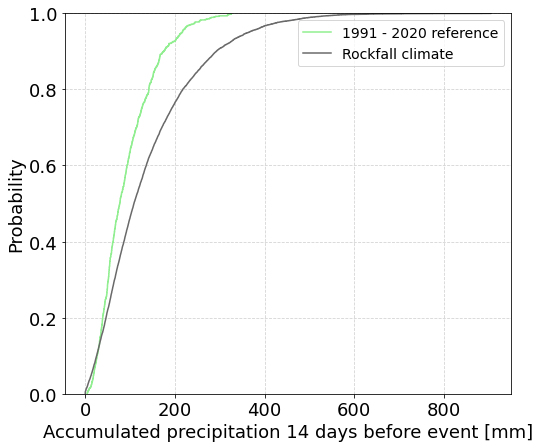

In [49]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_14_acc[' precipitation_amount'], color = 'lightgreen', label = '1991 - 2020 reference')
sns.ecdfplot(df['AccPrec14'], color = 'dimgrey', label = 'Rockfall climate')


plt.xlabel('Accumulated precipitation 14 days before event [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed', color = 'lightgrey')
plt.savefig('Cumulative_curves_reference_and_rockfall_14_days_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

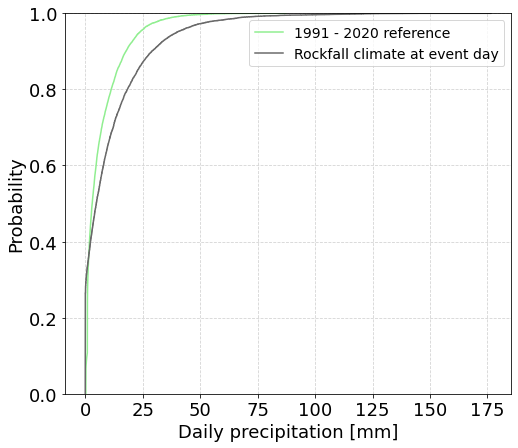

In [57]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_1_acc[' precipitation_amount'],  color = 'lightgreen', label = '1991 - 2020 reference')
sns.ecdfplot(df['PrecEventDay'], color = 'dimgrey', label = 'Rockfall climate at event day')


plt.xlabel('Daily precipitation [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed', color = 'lightgrey')
plt.savefig('Cumulative_curves_reference_and_rockfall_1_day_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

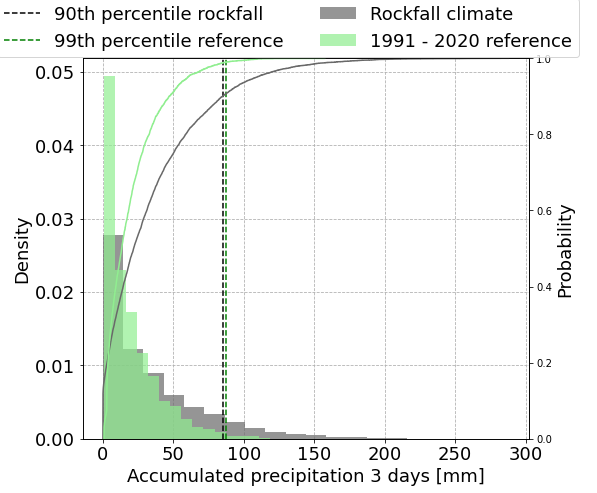

In [117]:
percentile952 = np.percentile(a = ref_grouped_3_acc[' precipitation_amount'], q = 99)

percentile95 = np.percentile(a = df['AccPrec3'], q = 90)

fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(df['AccPrec3'], stat = 'density', color = 'dimgrey', edgecolor = None, alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax = sns.histplot(ref_grouped_3_acc[' precipitation_amount'], stat = 'density', color = 'lightgreen', edgecolor = None, alpha = 0.7, kde = False, label = '1991 - 2020 reference', bins = 20)

ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Accumulated precipitation 3 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
ax.axvline(x = percentile95, color = 'k', label = '90th percentile rockfall', linestyle = 'dashed')
ax.axvline(x = percentile952, color = 'g', label = '99th percentile reference', linestyle = 'dashed')

sns.ecdfplot(df['AccPrec3'], color = 'dimgrey')
sns.ecdfplot(ref_grouped_3_acc[' precipitation_amount'], color = 'lightgreen')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2,fontsize=18)
    
plt.title('')
plt.savefig('Histogram_Acc_prec_3_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [214]:
ref_rolling_mean_3

time
1991-01-01          NaN
1991-01-02          NaN
1991-01-03    11.033658
1991-01-04    14.390325
1991-01-05    20.803658
                ...    
2019-07-08     2.684129
2019-07-09     2.052129
2019-07-10     1.527240
2019-07-11     1.025240
2019-07-12     1.023240
Name:  precipitation_amount, Length: 10420, dtype: float64

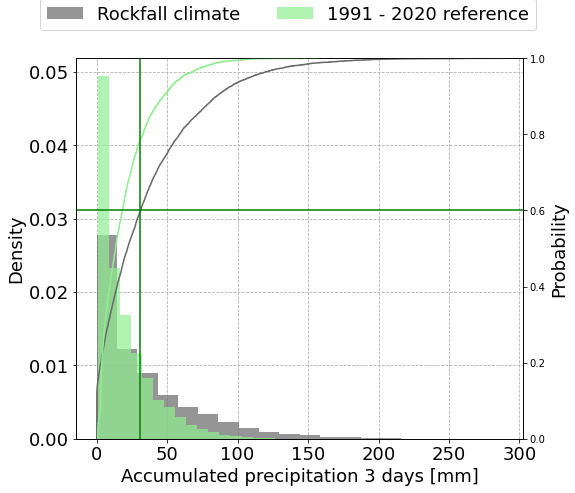

In [281]:
percentile952 = np.percentile(a = ref_rolling_mean_3, q = 99)

percentile95 = np.percentile(a = df['AccPrec3'], q = 90)

fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(df['AccPrec3'], stat = 'density', color = 'dimgrey', edgecolor = None, alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax = sns.histplot(ref_rolling_mean_3, stat = 'density', color = 'lightgreen', edgecolor = None, alpha = 0.7, kde = False, label = '1991 - 2020 reference', bins = 20)

ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Accumulated precipitation 3 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
#ax.axvline(x = percentile95, color = 'k', label = '90th percentile rockfall', linestyle = 'dashed')
#ax.axvline(x = percentile952, color = 'g', label = '99th percentile reference', linestyle = 'dashed')

sns.ecdfplot(df['AccPrec3'], color = 'dimgrey')
sns.ecdfplot(ref_grouped_3_acc[' precipitation_amount'], color = 'lightgreen')



fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2,fontsize=18)

ax2.axhline(y = 0.6, color = 'g')
ax2.axvline(x = 31, color = 'g')

plt.title('')
plt.savefig('Histogram_rolling_mean_3_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [279]:
df['AccPrec3'].quantile(.6)

31.15115294371673

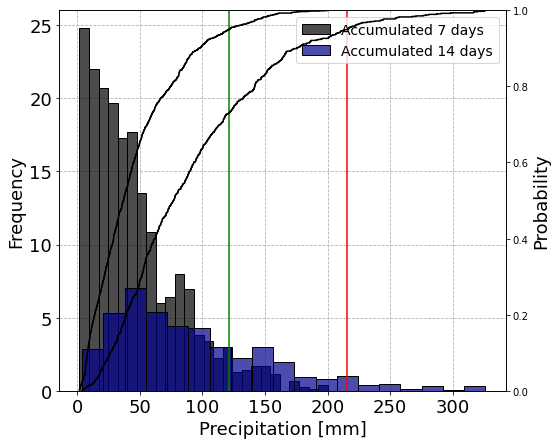

In [60]:
percentile95_7 = np.percentile(a = ref_grouped_7_acc[' precipitation_amount'], q = 95)
percentile95_14 = np.percentile(a = ref_grouped_14_acc[' precipitation_amount'], q = 95)

fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_7_acc[' precipitation_amount'], stat = 'frequency', color = 'k', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Accumulated 7 days')
ax = sns.histplot(ref_grouped_14_acc[' precipitation_amount'], stat = 'frequency', color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False,label = 'Accumulated 14 days')

ax.grid(linestyle='dashed')
ax.set_axisbelow(True)

plt.xlabel('Precipitation [mm]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(fontsize=14)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
sns.ecdfplot(ref_grouped_7_acc[' precipitation_amount'], color = 'k')
sns.ecdfplot(ref_grouped_14_acc[' precipitation_amount'], color = 'k')

ax.axvline(x = percentile95_7, color = 'g', label = '95 percentile 7 days')
ax.axvline(x = percentile95_14, color = 'r', label = '95 percentile 14 days')
plt.title('')
plt.savefig('Histogram_Acc_prec_7_14_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

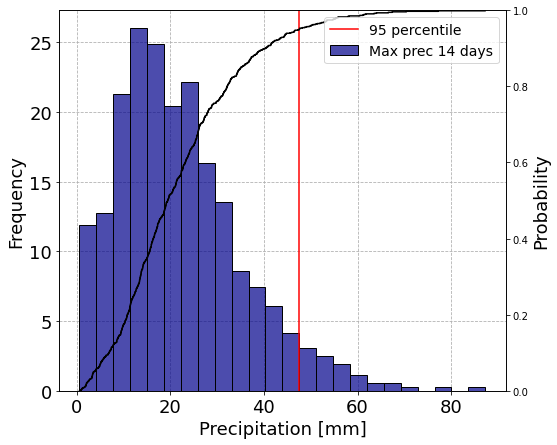

In [61]:
percentile95 = np.percentile(ref_grouped_14_max[' precipitation_amount'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))


ax = sns.histplot(ref_grouped_14_max[' precipitation_amount'], stat = 'frequency',  color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Max prec 14 days')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Precipitation [mm]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.axvline(x = percentile95, color = 'r', label = '95 percentile')

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
sns.ecdfplot(ref_grouped_14_max[' precipitation_amount'], color = 'k')
plt.title('')
fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)

plt.savefig('Histogram_max_prec_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

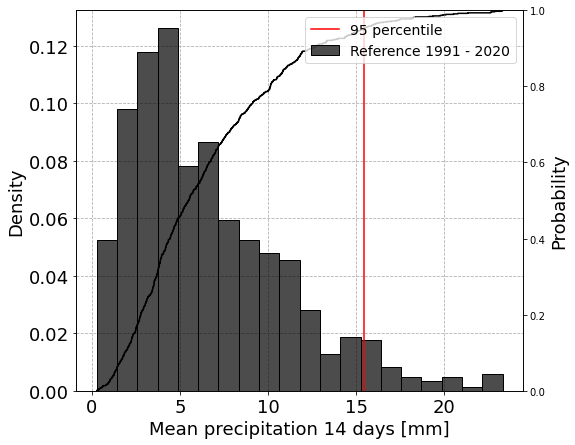

In [15]:
percentile95 = np.percentile(a = ref_grouped_14_mean[' precipitation_amount'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_14_mean[' precipitation_amount'], stat = 'density', color = 'k', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Reference 1991 - 2020', bins = 20)
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Mean precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('Histogram_mean_prec_14_PDF_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

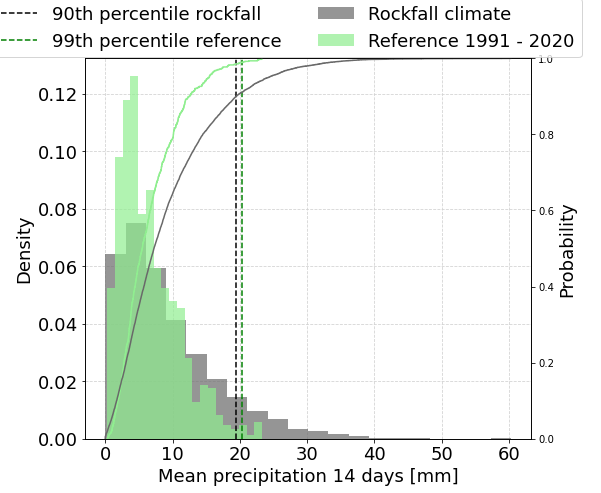

In [115]:
percentile952 = np.percentile(a =  ref_grouped_14_mean[' precipitation_amount'], q = 99)

percentile95 = np.percentile(a =df['mean_prec'], q = 90)

fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(df['mean_prec'], stat = 'density', color = 'dimgrey', edgecolor = None, alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax = sns.histplot(ref_grouped_14_mean[' precipitation_amount'], stat = 'density',  color = 'lightgreen',edgecolor = None, alpha = 0.7, kde = False, label = 'Reference 1991 - 2020', bins = 20)

ax.grid(linestyle='dashed', color = 'lightgrey')
ax.set_axisbelow(True)
plt.xlabel('Mean precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)


sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'lightgreen')
sns.ecdfplot(df['mean_prec'], color = 'dimgrey')

ax.axvline(x = percentile95, color = 'k', label = '90th percentile rockfall', linestyle = 'dashed')
ax.axvline(x = percentile952, color = 'g', label = '99th percentile reference', linestyle = 'dashed')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2,fontsize=18)

plt.title('')
plt.savefig('PDF_mean_prec_14_reference_and_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

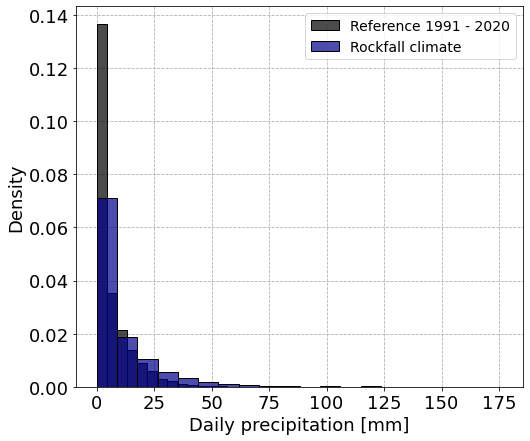

In [74]:
#percentile95 = np.percentile(a = ref_grouped_14_mean[' precipitation_amount'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(ref_grouped_1_mean[' precipitation_amount'], stat = 'density', color = 'k', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Reference 1991 - 2020', bins = 20)
ax = sns.histplot(df['PrecEventDay'], stat = 'density', color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)

ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Daily precipitation [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#ax2 = ax.twinx()
#plt.ylabel('Probability',fontsize=18)
#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
#sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('PDF_daily_prec_reference_and_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

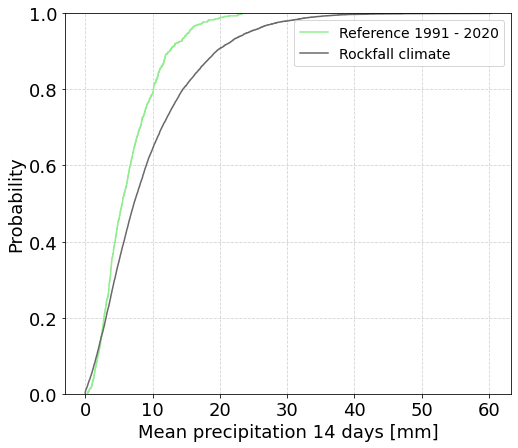

In [59]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'lightgreen', label = 'Reference 1991 - 2020')
sns.ecdfplot(df['mean_prec'], color = 'dimgrey', label = 'Rockfall climate')


plt.xlabel('Mean precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed', color = 'lightgrey')
plt.savefig('Cumulative_curves_reference_and_rockfall_mean_prec_14_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

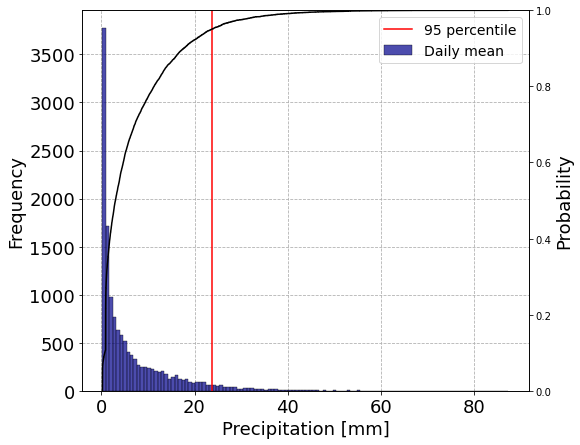

In [18]:
percentile95 = np.percentile(a = ref_grouped_1_mean[' precipitation_amount'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_1_mean[' precipitation_amount'], stat = 'frequency', color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Daily mean')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Precipitation [mm]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
sns.ecdfplot(ref_grouped_1_mean[' precipitation_amount'], color = 'k')
plt.title('')
fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)

plt.savefig('Histogram_Prec_mean_1_day_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

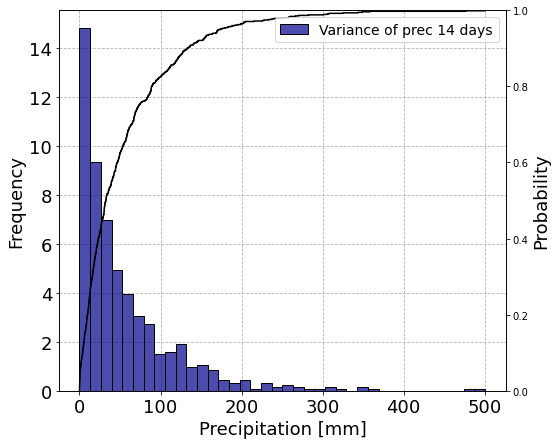

In [19]:
#percentile95 = np.percentile(a = df['mean_prec'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_14_var[' precipitation_amount'], stat = 'frequency', color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Variance of prec 14 days')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Precipitation [mm]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
sns.ecdfplot(ref_grouped_14_var[' precipitation_amount'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('Histogram_var_prec_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

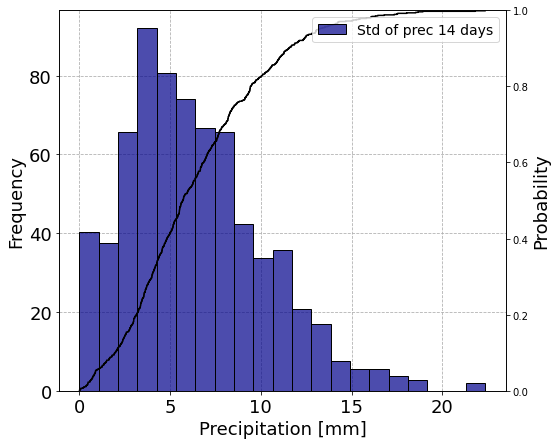

In [20]:
#percentile95 = np.percentile(a = df['mean_prec'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_14_std[' precipitation_amount'], stat = 'frequency', color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Std of prec 14 days')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Precipitation [mm]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
sns.ecdfplot(ref_grouped_14_std[' precipitation_amount'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('Histogram_std_prec_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

## Temperature

In [127]:
# temp range for the 14 days period

temp_range = ref_grouped_14_max[' mean_temperature'] - ref_grouped_14_min[' mean_temperature']

ref_mean['Temp_range14'] = temp_range

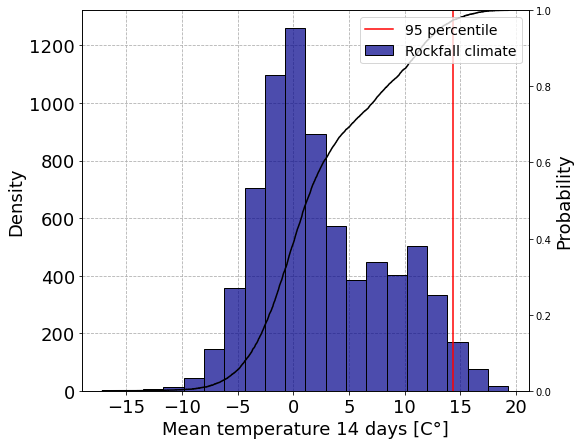

In [128]:

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))


ax = sns.histplot(df['mean_temp'], stat = 'frequency',  color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Mean temperature 14 days [C°]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.axvline(x = percentile95, color = 'r', label = '95 percentile')

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
sns.ecdfplot(df['mean_temp'], color = 'k')
plt.title('')
fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)

plt.savefig('Histogram_mean_temp_14_PDF_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

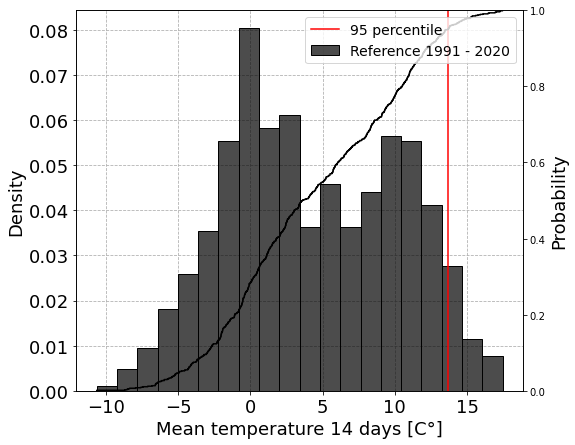

In [129]:
percentile95 = np.percentile(a = ref_grouped_14_mean[' mean_temperature'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_14_mean[' mean_temperature'], stat = 'density', color = 'k', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Reference 1991 - 2020', bins = 20)
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Mean temperature 14 days [C°]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
sns.ecdfplot(ref_grouped_14_mean[' mean_temperature'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('Histogram_mean_temp_14_PDF_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

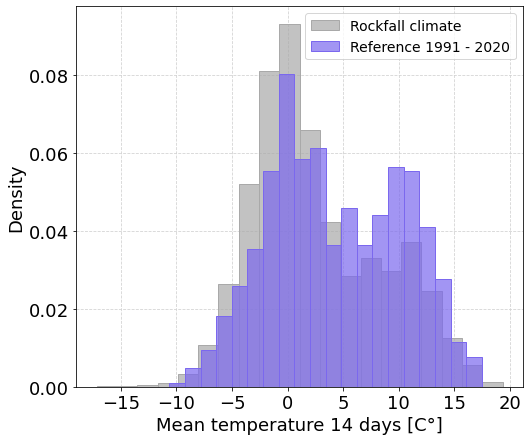

In [138]:

#percentile95 = np.percentile(a = ref_grouped_14_mean[' precipitation_amount'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(df['mean_temp'], stat = 'density', color = 'darkgrey', edgecolor = 'darkgrey', alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax = sns.histplot(ref_grouped_14_mean[' mean_temperature'], stat = 'density', color = 'mediumslateblue', edgecolor = 'mediumslateblue', alpha = 0.7, kde = False, label = 'Reference 1991 - 2020', bins = 20)

ax.grid(linestyle='dashed', color = 'lightgrey')
ax.set_axisbelow(True)
plt.xlabel('Mean temperature 14 days [C°]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#ax2 = ax.twinx()
#plt.ylabel('Probability',fontsize=18)
#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
#sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('PDF_mean_temp_14_reference_and_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [140]:
df['var1']

KeyError: 'var1'

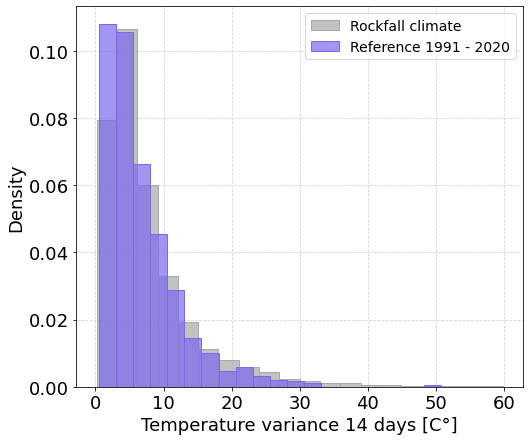

In [141]:
# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(df['var_temp'], stat = 'density', color = 'darkgrey', edgecolor = 'darkgrey', alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax = sns.histplot(ref_grouped_14_var[' mean_temperature'], stat = 'density', color = 'mediumslateblue', edgecolor = 'mediumslateblue', alpha = 0.7, kde = False, label = 'Reference 1991 - 2020', bins = 20)

ax.grid(linestyle='dashed', color = 'lightgrey')
ax.set_axisbelow(True)
plt.xlabel('Temperature variance 14 days [C°]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#ax2 = ax.twinx()
#plt.ylabel('Probability',fontsize=18)
#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
#sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('PDF_variance_temp_14_reference_and_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

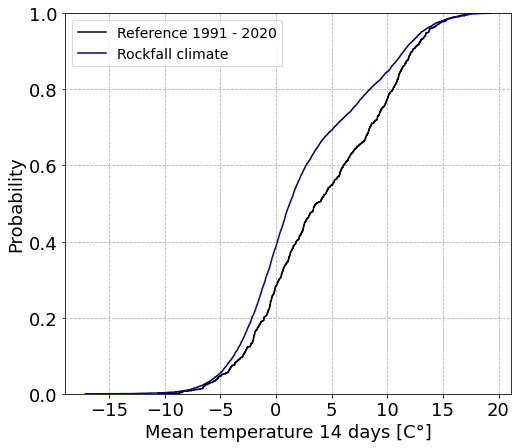

In [25]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_14_mean[' mean_temperature'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(df['mean_temp'], color = 'darkblue', label = 'Rockfall climate')


plt.xlabel('Mean temperature 14 days [C°]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('Cumulative_curves_reference_and_rockfall_mean_temp_14_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

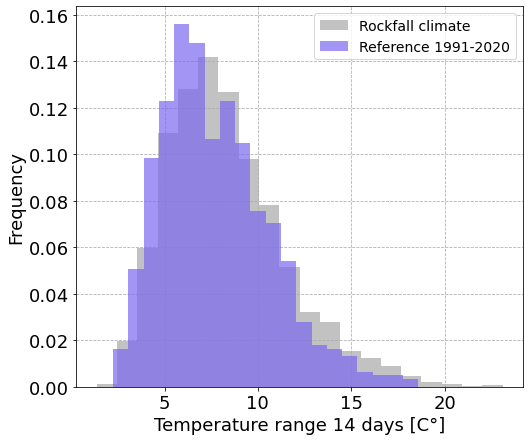

In [132]:
percentile95 = np.percentile(a = df['Temp_range14'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))


ax = sns.histplot(df['Temp_range14'], stat = 'density', color = 'darkgrey', edgecolor = None, alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax = sns.histplot(temp_range, stat = 'density',   color = 'mediumslateblue', edgecolor = None, alpha = 0.7, kde = False, label = 'Reference 1991-2020', bins = 20)
                  
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Temperature range 14 days [C°]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


#ax2 = ax.twinx()
#plt.ylabel('Probability',fontsize=18)

#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
#sns.ecdfplot(temp_range, color = 'k')
#sns.ecdfplot(df['Temp_range14'],  color = 'darkblue')

plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
fig.savefig('Histogram_Temp_range_14_reference_density_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)




# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(df['Temp_fluct'], stat = 'frequency', color = 'k', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Number of fluctuations aroud 0 C°')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
ax.legend(fontsize=16)

plt.xlabel('Count',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(fontsize=16)

#sns.ecdfplot(df['Temp_fluct'], color = 'k')
plt.title('')

plt.savefig('Histogram_Temp_fluct_14_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [32]:
#df.columns

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(df['near_zero_events14'], stat = 'frequency', color = 'k', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Near zero events 14 days')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Count',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(fontsize=16)

#ax2 = ax.twinx()

#sns.ecdfplot(df['near_zero_events14'], color = 'k')
plt.title('')

fig.savefig('Histogram_near_zero_events14_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)


# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(df['near_zero_events7'], stat = 'frequency', color = 'k', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Near zero events 7 days')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Count',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(fontsize=16)

#ax2 = ax.twinx()

#sns.ecdfplot(df['near_zero_events7'], color = 'k')
plt.title('')

fig.savefig('Histogram_near_zero_events7_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)


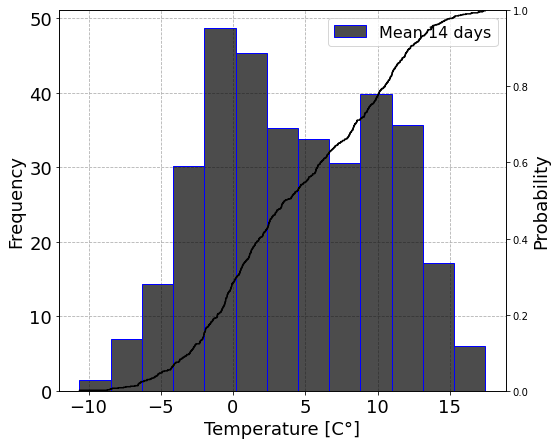

In [33]:
# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_14_mean[' mean_temperature'], stat = 'frequency', color = 'k', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Mean 14 days')


ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Temperature [C°]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc = 1,fontsize=16)

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
sns.ecdfplot(ref_grouped_14_mean[' mean_temperature'], color = 'k')

#ax.axvline(x = 1,linestyle = 'dashed')
#ax.axvline(x = 13,linestyle = 'dashed')

plt.title('')

fig.savefig('Histogram_mean_temp_14_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)


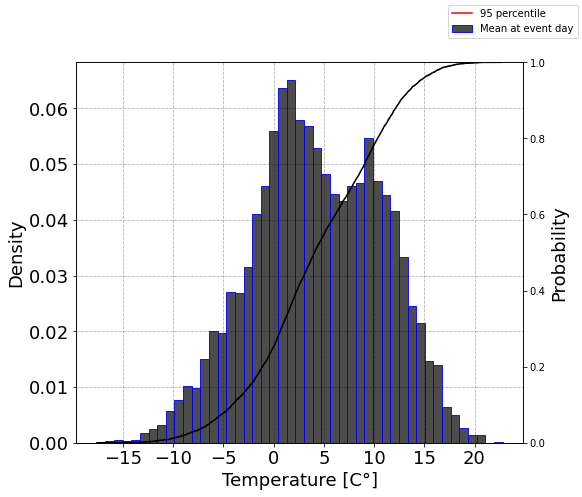

In [34]:
percentile95 = np.percentile(a = ref_grouped_1_mean[' mean_temperature'], q = 95)


# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_1_mean[' mean_temperature'], stat = 'density', color = 'k', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Mean at event day')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Temperature [C°]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.legend()

ax2 = ax.twinx()
plt.ylabel('Probability',fontsize=18)
sns.ecdfplot(ref_grouped_1_mean[' mean_temperature'], color = 'k')

ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
#ax.axvline(x = 0,linestyle = 'dashed')
#ax.axvline(x = 5.4,linestyle = 'dashed')
#ax2.axhline(y = 0.6, linestyle = 'dashed')
#ax2.axhline(y = 0.128, linestyle = 'dashed')

plt.title('')
fig.legend()
fig.savefig('Histogram_mean_temp_1_day_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)


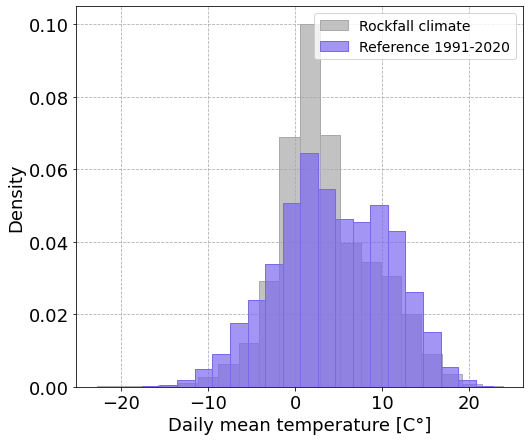

In [137]:
percentile95 = np.percentile(a = df['Temp_range14'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(df['MeanTempEventDay'], stat = 'density', color = 'darkgrey', edgecolor = 'darkgrey', alpha = 0.7, kde = False, label = 'Rockfall climate', bins = 20)
ax = sns.histplot(ref_grouped_1_mean[' mean_temperature'], stat = 'density',  color = 'mediumslateblue', edgecolor = 'mediumslateblue', alpha = 0.7, kde = False, label = 'Reference 1991-2020', bins = 20) 

ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Daily mean temperature [C°]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


#ax2 = ax.twinx()
#plt.ylabel('Probability',fontsize=18)

#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
#sns.ecdfplot(temp_range, color = 'k')
#sns.ecdfplot(df['Temp_range14'],  color = 'darkblue')

plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
fig.savefig('PDF_daily_temp_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)



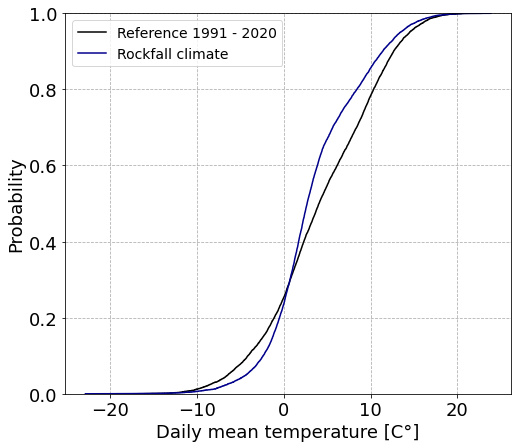

In [70]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_1_mean[' mean_temperature'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(df['MeanTempEventDay'], color = 'darkblue', label = 'Rockfall climate')


plt.xlabel('Daily mean temperature [C°]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_and_rockfall_daily_mean_temp_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

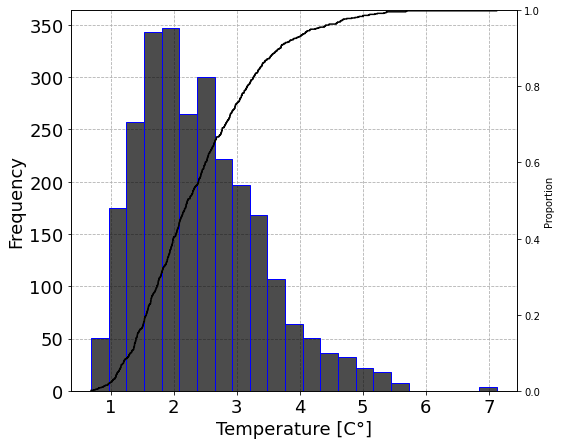

In [29]:
# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_14_std[' mean_temperature'], stat = 'frequency', color = 'k', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Standard deviation 14 days')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Temperature [C°]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.legend()

ax2 = ax.twinx()
#ax.axvline(x = 3,linestyle = 'dashed')
#ax2.axhline(y = 0.73, linestyle = 'dashed')
sns.ecdfplot(ref_grouped_14_std[' mean_temperature'], color = 'k')


plt.title('')

fig.savefig('Histogram_std_14_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)




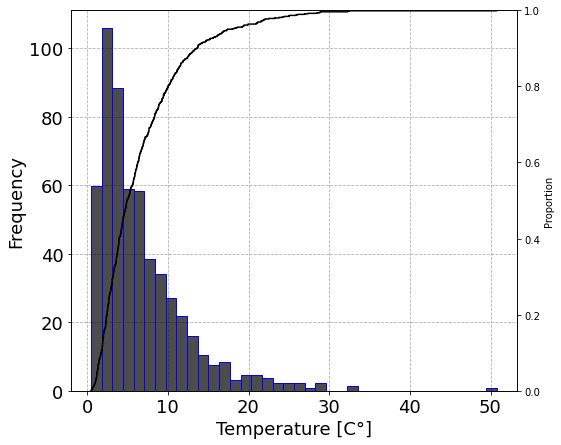

In [30]:
# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(ref_grouped_14_var[' mean_temperature'], stat = 'frequency', color = 'k', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Variance 14 days')
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Temperature [C°]',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.legend()

ax2 = ax.twinx()
#ax.axvline(x = 4,linestyle = 'dashed')
#ax2.axhline(y = 0.73, linestyle = 'dashed')
sns.ecdfplot(ref_grouped_14_var[' mean_temperature'], color = 'k')


plt.title('')

fig.savefig('Histogram_var_temp_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)




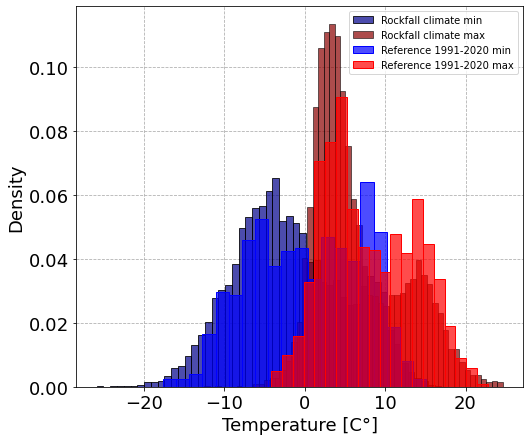

In [31]:
# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))
    
ax = sns.histplot(df['min_temp'], stat = 'density', color = 'darkblue', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Rockfall climate min')
ax = sns.histplot(df['max_temp'], stat = 'density', color = 'darkred', edgecolor = 'k', alpha = 0.7, kde = False, label = 'Rockfall climate max')

ax = sns.histplot(ref_grouped_14_min[' mean_temperature'], stat = 'density', color = 'b', edgecolor = 'b', alpha = 0.7, kde = False, label = 'Reference 1991-2020 min', bins = 20)
ax = sns.histplot(ref_grouped_14_max[' mean_temperature'], stat = 'density', color = 'r', edgecolor = 'r', alpha = 0.7, kde = False, label = 'Reference 1991-2020 max', bins = 20)


ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Temperature [C°]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#ax2 = ax.twinx()
#ax2.legend()

#ax2 = sns.ecdfplot(ref_grouped_1_min[' mean_temperature'], color = 'b', label = 'Cumulative min')
#ax2 = sns.ecdfplot(ref_grouped_1_max[' mean_temperature'], color = 'r',label = 'Cumulative max')
plt.title('')

fig.savefig('PDF_min_max_temp_14_days_reference_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)
fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

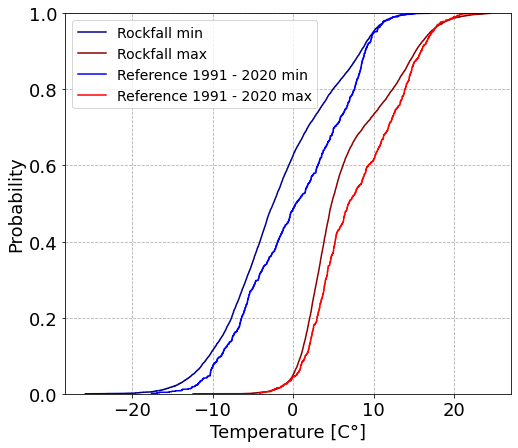

In [33]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(df['min_temp'], color = 'darkblue', label = 'Rockfall min')
sns.ecdfplot(df['max_temp'], color = 'darkred', label = 'Rockfall max')

sns.ecdfplot(ref_grouped_14_min[' mean_temperature'], color = 'b', label = 'Reference 1991 - 2020 min')
sns.ecdfplot(ref_grouped_14_max[' mean_temperature'], color = 'r', label = 'Reference 1991 - 2020 max')

plt.xlabel('Temperature [C°]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_and_rockfall_min_max_temp_Vestland.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

### Seasonal dristributions

In [143]:
# rockfall climate

#d = df['skredTidspunkt']
#date=pd.to_datetime(d, errors = 'coerce')

#date = ['skredTidspunkt']
#year = date.dt.year
#month = date.dt.month

In [144]:
df['skredTidspunkt'] = pd.to_datetime(df['skredTidspunkt'],errors = 'coerce', dayfirst = True)

In [145]:
df['skredTidspunkt'] = df['skredTidspunkt'].dt.date

In [146]:
df['skredTidspunkt'] = pd.to_datetime(df['skredTidspunkt'])

In [147]:
year = df['skredTidspunkt'].dt.year
month = df['skredTidspunkt'].dt.month

In [148]:
# seasons

# spring

march = df[month== 3]
april = df[month== 4]
may = df[month== 5]

spring = [march, april, may]
spring = pd.concat(spring)

spring_d = spring['skredTidspunkt']	

date_spring =pd.to_datetime(spring_d)

year_spring = date_spring.dt.year
month_spring  = date_spring.dt.month


# summer 

jun = df[month== 6]
jul = df[month== 7]
aug = df[month== 8]

summer = [jun, jul, aug]
summer = pd.concat(summer)

summer_date = pd.to_datetime(summer['skredTidspunkt'])
summer_month = pd.DatetimeIndex(summer['skredTidspunkt']).month

# autumn

sep = df[month== 9]
okt = df[month== 10]
nov = df[month== 11]

autumn = [sep, okt, nov]
autumn = pd.concat(autumn)

autumn_date = pd.to_datetime(autumn['skredTidspunkt'])
autumn_month = pd.DatetimeIndex(autumn['skredTidspunkt']).month

# winter

dec = df[month== 12]
jan = df[month== 1]
feb = df[month== 2]

winter = [dec, jan, feb]
winter = pd.concat(winter)

winter_date = pd.to_datetime(winter['skredTidspunkt'])
winter_month = pd.DatetimeIndex(winter['skredTidspunkt']).month

In [155]:
# reference climate

ref_mean['time'] = ref_mean.index
d = ref_mean['time']
date=pd.to_datetime(d, errors = 'coerce')

year = date.dt.year
month = date.dt.month

In [157]:
# reference climate

ref_grouped_14_mean['time'] = ref_grouped_14_mean.index
d = ref_grouped_14_mean['time']
date=pd.to_datetime(d, errors = 'coerce')

year2 = date.dt.year
month2 = date.dt.month

In [158]:
ref_mean

mean_temperature   precipitation_amount  Temp_range14       time
time                                                                         
1991-01-01          -1.543794               6.469283        6.5675 1991-01-01
1991-01-02          -0.735044               3.267408           NaN 1991-01-02
1991-01-03           0.999956              23.364283           NaN 1991-01-03
1991-01-04           0.449331              16.539283           NaN 1991-01-04
1991-01-05          -0.190669              22.507408           NaN 1991-01-05
...                       ...                    ...           ...        ...
2019-07-08           9.983559               2.523907           NaN 2019-07-08
2019-07-09          10.876892               0.945240        4.7180 2019-07-09
2019-07-10          12.245559               1.112573           NaN 2019-07-10
2019-07-11          14.274892               1.017907           NaN 2019-07-11
2019-07-12          15.594892               0.939240           NaN 2019-07-12

[10420 rows x 4 columns]

In [159]:
# seasons reference

# sping

march = ref_mean[month== 3]
april = ref_mean[month== 4]
may = ref_mean[month== 5]

ref_mean_spring = [march, april, may]
ref_mean_spring = pd.concat(ref_mean_spring)


# summer 

jun = ref_mean[month== 6]
jul = ref_mean[month== 7]
aug = ref_mean[month== 8]

ref_mean_summer = [jun, jul, aug]
ref_mean_summer = pd.concat(ref_mean_summer)


# autumn

sep = ref_mean[month== 9]
okt = ref_mean[month== 10]
nov = ref_mean[month== 11]

ref_mean_autumn = [sep, okt, nov]
ref_mean_autumn = pd.concat(ref_mean_autumn)


# winter

dec = ref_mean[month== 12]
jan = ref_mean[month== 1]
feb = ref_mean[month== 2]

ref_mean_winter = [dec, jan, feb]
ref_mean_winter = pd.concat(ref_mean_winter)



In [180]:
ref_mean

mean_temperature   precipitation_amount  Temp_range14       time
time                                                                         
1991-01-01          -1.543794               6.469283        6.5675 1991-01-01
1991-01-02          -0.735044               3.267408           NaN 1991-01-02
1991-01-03           0.999956              23.364283           NaN 1991-01-03
1991-01-04           0.449331              16.539283           NaN 1991-01-04
1991-01-05          -0.190669              22.507408           NaN 1991-01-05
...                       ...                    ...           ...        ...
2019-07-08           9.983559               2.523907           NaN 2019-07-08
2019-07-09          10.876892               0.945240        4.7180 2019-07-09
2019-07-10          12.245559               1.112573           NaN 2019-07-10
2019-07-11          14.274892               1.017907           NaN 2019-07-11
2019-07-12          15.594892               0.939240           NaN 2019-07-12

[10420 rows x 4 columns]

In [161]:
ref_grouped_14_mean

mean_temperature   precipitation_amount       time
time                                                           
1991-01-01          -2.095267               8.871604 1991-01-01
1991-01-15          -1.078169               5.730533 1991-01-15
1991-01-29          -5.198169               0.500890 1991-01-29
1991-02-12          -4.123928               6.950310 1991-02-12
1991-02-26          -0.886606               2.025131 1991-02-26
...                       ...                    ...        ...
2019-05-14          10.238174               2.927859 2019-05-14
2019-05-28           8.070416               8.421716 2019-05-28
2019-06-11          10.961559               5.064383 2019-06-11
2019-06-25          10.074130               7.188764 2019-06-25
2019-07-09          13.248059               1.003740 2019-07-09

[745 rows x 3 columns]

In [167]:
# seasons reference

# sping

march = ref_grouped_14_mean[month2== 3]
april = ref_grouped_14_mean[month2== 4]
may = ref_grouped_14_mean[month2== 5]

ref_grouped_14_mean_spring = [march, april, may]
ref_grouped_14_mean_spring = pd.concat(ref_grouped_14_mean_spring)


# summer 

jun = ref_grouped_14_mean[month2== 6]
jul = ref_grouped_14_mean[month2== 7]
aug = ref_grouped_14_mean[month2== 8]

ref_grouped_14_mean_summer = [jun, jul, aug]
ref_grouped_14_mean_summer = pd.concat(ref_grouped_14_mean_summer)


# autumn

sep = ref_grouped_14_mean[month2== 9]
okt = ref_grouped_14_mean[month2== 10]
nov = ref_grouped_14_mean[month2== 11]

ref_grouped_14_mean_autumn = [sep, okt, nov]
ref_grouped_14_mean_autumn = pd.concat(ref_grouped_14_mean_autumn )


# winter

dec = ref_grouped_14_mean[month2== 12]
jan = ref_grouped_14_mean[month2== 1]
feb = ref_grouped_14_mean[month2== 2]

ref_grouped_14_mean_winter = [dec, jan, feb]
ref_grouped_14_mean_winter = pd.concat(ref_grouped_14_mean_winter)



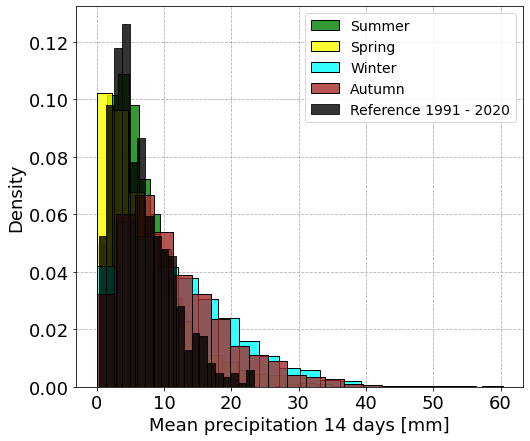

In [45]:
#percentile95 = np.percentile(a = ref_grouped_14_mean[' precipitation_amount'], q = 95)

# Density Plot and Histogram 
fig = plt.figure(figsize=(8, 7))

ax = sns.histplot(summer['mean_prec'], stat = 'density', color = 'g', edgecolor = 'k', alpha = 0.8, kde = False, label = 'Summer', bins = 20)
ax = sns.histplot(spring['mean_prec'], stat = 'density', color = 'yellow', edgecolor = 'k', alpha = 0.8, kde = False, label = 'Spring', bins = 20)
ax = sns.histplot(winter['mean_prec'], stat = 'density', color = 'cyan', edgecolor = 'k', alpha = 0.8, kde = False, label = 'Winter', bins = 20)
ax = sns.histplot(autumn['mean_prec'], stat = 'density', color = 'brown', edgecolor = 'k', alpha = 0.8, kde = False, label = 'Autumn', bins = 20)
ax = sns.histplot(ref_grouped_14_mean[' precipitation_amount'], stat = 'density', color = 'k', edgecolor = 'k', alpha = 0.8, kde = False, label = 'Reference 1991 - 2020', bins = 20)

ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
plt.xlabel('Mean precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#ax2 = ax.twinx()
#plt.ylabel('Probability',fontsize=18)
#ax.axvline(x = percentile95, color = 'r', label = '95 percentile')
#sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'k')
plt.title('')

fig.legend(loc =1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=14)
plt.savefig('PDF_mean_prec_14_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

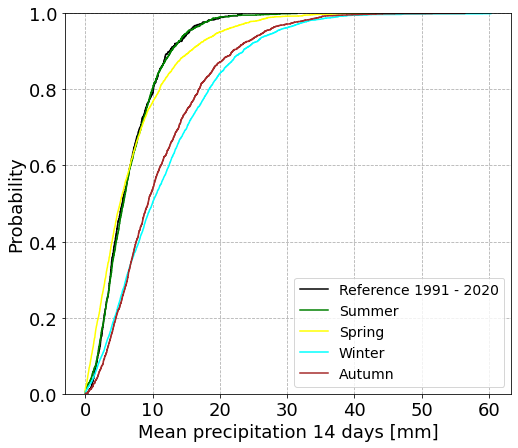

In [46]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_14_mean[' precipitation_amount'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(summer['mean_prec'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['mean_prec'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['mean_prec'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['mean_prec'], color = 'brown', label = 'Autumn')


plt.xlabel('Mean precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_and_rockfall_mean_prec_14_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

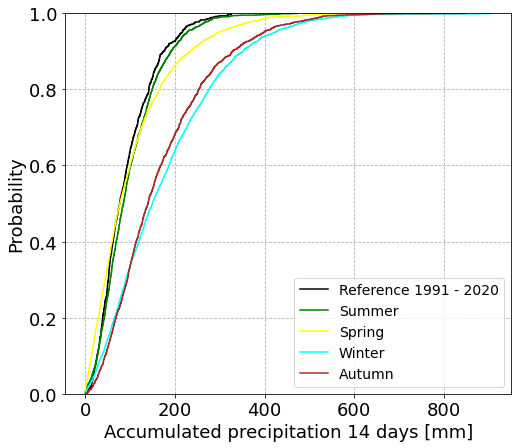

In [47]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_14_acc[' precipitation_amount'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(summer['AccPrec14'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['AccPrec14'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['AccPrec14'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['AccPrec14'], color = 'brown', label = 'Autumn')


plt.xlabel('Accumulated precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_and_rockfall_acc_prec_14_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

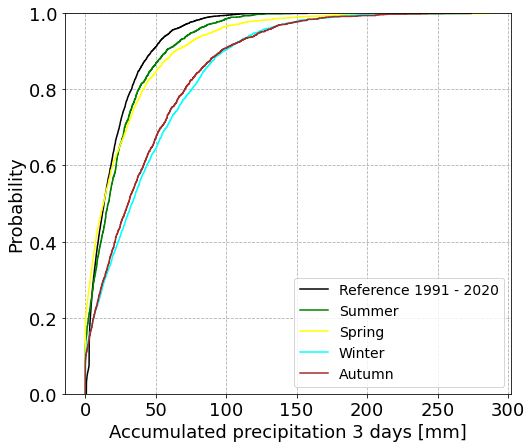

In [49]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_3_acc[' precipitation_amount'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(summer['AccPrec3'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['AccPrec3'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['AccPrec3'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['AccPrec3'], color = 'brown', label = 'Autumn')


plt.xlabel('Accumulated precipitation 3 days [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_and_rockfall_acc_prec_3_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

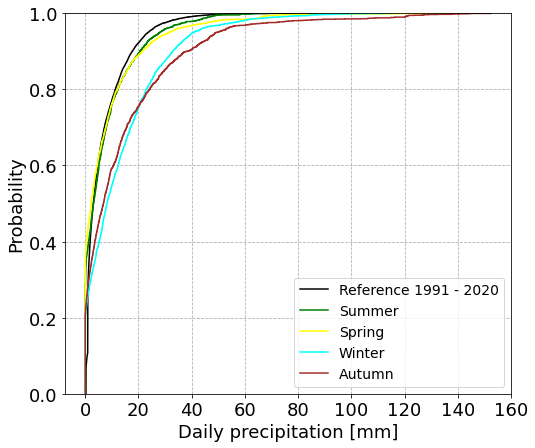

In [50]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_1_mean[' precipitation_amount'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(summer['PrecEventDay'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['PrecEventDay'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['PrecEventDay'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['PrecEventDay'], color = 'brown', label = 'Autumn')


plt.xlabel('Daily precipitation [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_and_rockfall_event_day_prec_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

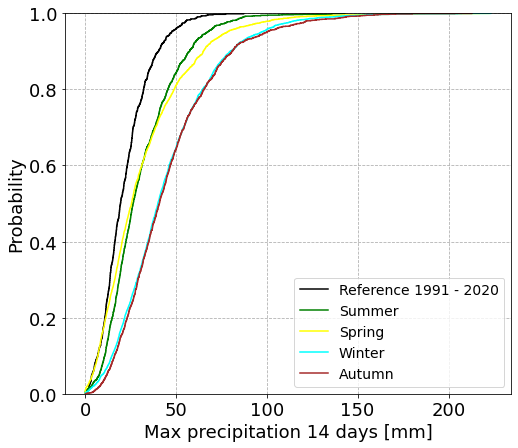

In [51]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_grouped_14_max[' precipitation_amount'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(summer['max_prec'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['max_prec'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['max_prec'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['max_prec'], color = 'brown', label = 'Autumn')


plt.xlabel('Max precipitation 14 days [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_and_rockfall_max_prec_14_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

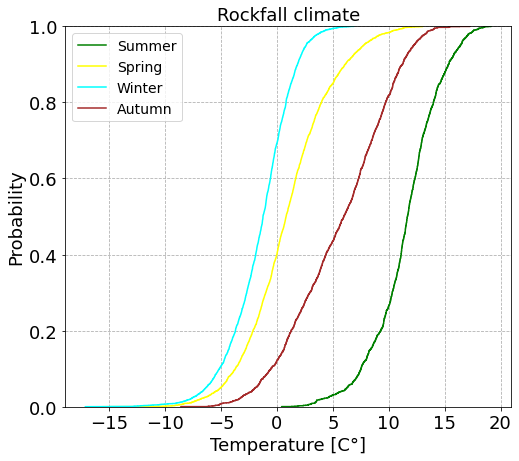

In [171]:
fig = plt.figure(figsize=(8, 7))

#sns.ecdfplot(ref_grouped_14_mean[' mean_temperature'], color = 'k', label = 'Reference 1991 - 2020')
sns.ecdfplot(summer['mean_temp'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['mean_temp'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['mean_temp'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['mean_temp'], color = 'brown', label = 'Autumn')


plt.xlabel('Temperature [C°]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)

plt.title('Rockfall climate',fontsize=18)

plt.grid(linestyle='dashed')
plt.savefig('CDF_rockfall_mean_temp_14_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

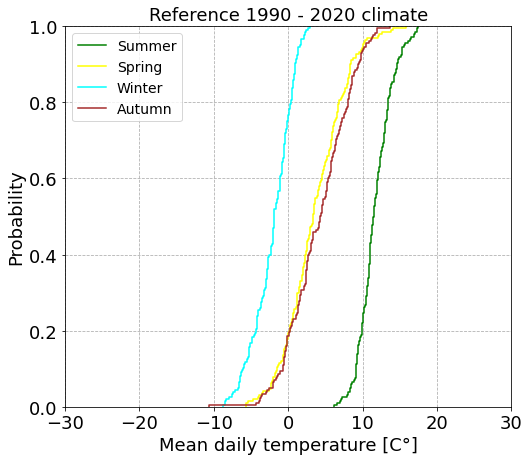

In [172]:
fig = plt.figure(figsize=(8, 7))

#sns.ecdfplot(ref_grouped_1_mean[' mean_temperature'], color = 'k', label = 'Reference 1990 - 2020')
sns.ecdfplot(ref_grouped_14_mean_summer[' mean_temperature'], color = 'g', label = 'Summer')
sns.ecdfplot(ref_grouped_14_mean_spring[' mean_temperature'], color = 'yellow', label = 'Spring')
sns.ecdfplot(ref_grouped_14_mean_winter[' mean_temperature'], color = 'cyan', label = 'Winter')
sns.ecdfplot(ref_grouped_14_mean_autumn[' mean_temperature'], color = 'brown', label = 'Autumn')


plt.xlabel('Mean daily temperature [C°]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.xlim(-30,30)
plt.title('Reference 1990 - 2020 climate',fontsize=18)
plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_mean_temp_14_daily_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)#

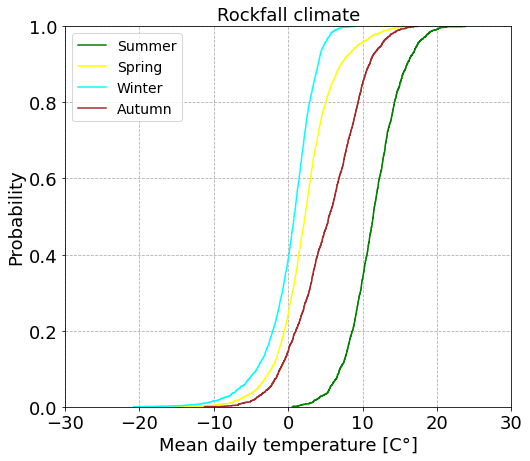

In [293]:
fig = plt.figure(figsize=(8, 7))

#sns.ecdfplot(ref_grouped_1_mean[' mean_temperature'], color = 'k', label = 'Reference 1990 - 2020')
sns.ecdfplot(summer['MeanTempEventDay'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['MeanTempEventDay'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['MeanTempEventDay'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['MeanTempEventDay'], color = 'brown', label = 'Autumn')


plt.xlabel('Mean daily temperature [C°]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-30,30)
plt.legend(fontsize=14)
plt.title('Rockfall climate',fontsize=18)

plt.grid(linestyle='dashed')
plt.savefig('CDF_rockfall_mean_temp_daily_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [296]:
summer['MeanTempEventDay'].quantile(.5)
winter['MeanTempEventDay'].quantile(.5)
autumn['MeanTempEventDay'].quantile(.5)
spring['MeanTempEventDay'].quantile(.5)

2.26576403717041

In [330]:
autumn['MeanTempEventDay'].quantile(.8)

9.396835383239747

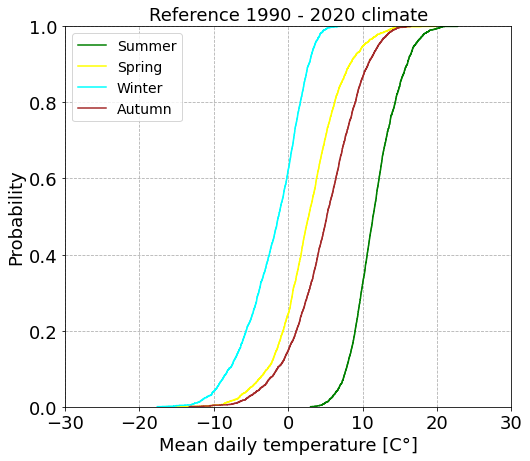

In [72]:
fig = plt.figure(figsize=(8, 7))

#sns.ecdfplot(ref_grouped_1_mean[' mean_temperature'], color = 'k', label = 'Reference 1990 - 2020')
sns.ecdfplot(ref_mean_summer[' mean_temperature'], color = 'g', label = 'Summer')
sns.ecdfplot(ref_mean_spring[' mean_temperature'], color = 'yellow', label = 'Spring')
sns.ecdfplot(ref_mean_winter[' mean_temperature'], color = 'cyan', label = 'Winter')
sns.ecdfplot(ref_mean_autumn[' mean_temperature'], color = 'brown', label = 'Autumn')


plt.xlabel('Mean daily temperature [C°]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.xlim(-30,30)
plt.title('Reference 1990 - 2020 climate',fontsize=18)
plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_mean_temp_daily_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [297]:
ref_mean_summer[' mean_temperature'].quantile(.5)
ref_mean_winter[' mean_temperature'].quantile(.5)
ref_mean_autumn[' mean_temperature'].quantile(.5)
ref_mean_spring[' mean_temperature'].quantile(.5)

2.751558914264062

In [331]:
ref_mean_autumn[' mean_temperature'].quantile(.8)

9.010017780497366

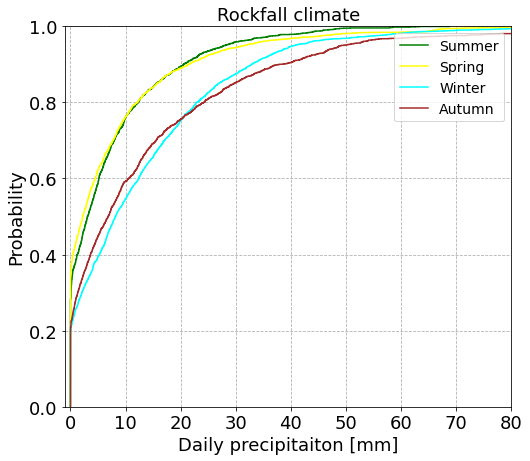

In [189]:
fig = plt.figure(figsize=(8, 7))

#sns.ecdfplot(ref_grouped_1_mean[' mean_temperature'], color = 'k', label = 'Reference 1990 - 2020')
sns.ecdfplot(summer['PrecEventDay'], color = 'g', label = 'Summer')
sns.ecdfplot(spring['PrecEventDay'], color = 'yellow', label = 'Spring')
sns.ecdfplot(winter['PrecEventDay'], color = 'cyan', label = 'Winter')
sns.ecdfplot(autumn['PrecEventDay'], color = 'brown', label = 'Autumn')


plt.xlabel('Daily precipitaiton [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-1,80)
plt.title('Rockfall climate',fontsize=18)

plt.legend(loc = 1,fontsize=14)
plt.grid(linestyle='dashed')
plt.savefig('CDF_rockfall_daily_prec_daily_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [291]:
autumn['PrecEventDay'].quantile(.8)

24.201999999999998

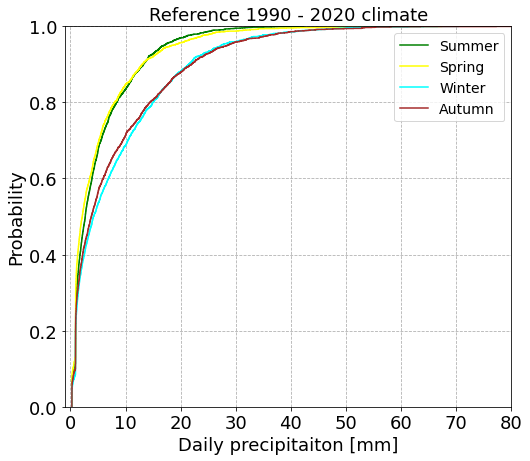

In [287]:
fig = plt.figure(figsize=(8, 7))

sns.ecdfplot(ref_mean_summer[' precipitation_amount'], color = 'g', label = 'Summer')
sns.ecdfplot(ref_mean_spring[' precipitation_amount'], color = 'yellow', label = 'Spring')
sns.ecdfplot(ref_mean_winter[' precipitation_amount'], color = 'cyan', label = 'Winter')
sns.ecdfplot(ref_mean_autumn[' precipitation_amount'], color = 'brown', label = 'Autumn')


plt.xlabel('Daily precipitaiton [mm]',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc = 1,fontsize=14)
plt.xlim(-1,80)
plt.title('Reference 1990 - 2020 climate',fontsize=18)
plt.grid(linestyle='dashed')
plt.savefig('CDF_reference_mean_prec_daily_Seasons.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [292]:
ref_mean_autumn[' precipitation_amount'].quantile(.8)

14.392306567708331